In [68]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.impute import KNNImputer
from sklearn.linear_model import Ridge, Lasso

from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as rmse

import warnings
warnings.filterwarnings('ignore')

# Loading the data

In [69]:
aq = pd.read_csv('./Dataset/AirQualityUCI.csv', sep=';', decimal=',', header=0)

In [70]:
aq.head(10)

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   
5  10/03/2004  23.00.00     1.2       1197.0      38.0       4.7   
6  11/03/2004  00.00.00     1.2       1185.0      31.0       3.6   
7  11/03/2004  01.00.00     1.0       1136.0      31.0       3.3   
8  11/03/2004  02.00.00     0.9       1094.0      24.0       2.3   
9  11/03/2004  03.00.00     0.6       1010.0      19.0       1.7   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   
5          750.0     89.0        1337.0     96.0        1393.0        949.0   
6          690.0     62.0        1462.0     77.0        1333.0        733.0   
7          672.0     62.0        1453.0     76.0        1333.0        730.0   
8          609.0     45.0        1579.0     60.0        1276.0        620.0   
9          561.0   -200.0        1705.0   -200.0        1235.0        501.0   

      T    RH      AH  Unnamed: 15  Unnamed: 16  
0  13.6  48.9  0.7578          NaN          NaN  
1  13.3  47.7  0.7255          NaN          NaN  
2  11.9  54.0  0.7502          NaN          NaN  
3  11.0  60.0  0.7867          NaN          NaN  
4  11.2  59.6  0.7888          NaN          NaN  
5  11.2  59.2  0.7848          NaN          NaN  
6  11.3  56.8  0.7603          NaN          NaN  
7  10.7  60.0  0.7702          NaN          NaN  
8  10.7  59.7  0.7648          NaN          NaN  
9  10.3  60.2  0.7517          NaN          NaN

We have trash columns 'Unnamed:15' and 'Unnamed:16', so we should drop them.

In [71]:
aq.drop(['Unnamed: 15','Unnamed: 16'], axis=1, inplace=True)
aq.head(10)

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   
5  10/03/2004  23.00.00     1.2       1197.0      38.0       4.7   
6  11/03/2004  00.00.00     1.2       1185.0      31.0       3.6   
7  11/03/2004  01.00.00     1.0       1136.0      31.0       3.3   
8  11/03/2004  02.00.00     0.9       1094.0      24.0       2.3   
9  11/03/2004  03.00.00     0.6       1010.0      19.0       1.7   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   
5          750.0     89.0        1337.0     96.0        1393.0        949.0   
6          690.0     62.0        1462.0     77.0        1333.0        733.0   
7          672.0     62.0        1453.0     76.0        1333.0        730.0   
8          609.0     45.0        1579.0     60.0        1276.0        620.0   
9          561.0   -200.0        1705.0   -200.0        1235.0        501.0   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
3  11.0  60.0  0.7867  
4  11.2  59.6  0.7888  
5  11.2  59.2  0.7848  
6  11.3  56.8  0.7603  
7  10.7  60.0  0.7702  
8  10.7  59.7  0.7648  
9  10.3  60.2  0.7517

In [72]:
aq.shape

(9471, 15)

In [73]:
aq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [74]:
aq.describe()

CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.990061  -159.090093     1.865683     894.595276   
std      77.657170   329.832710   139.789093    41.380206     342.333252   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.000000     711.000000   
50%       1.500000  1053.000000  -200.000000     7.900000     895.000000   
75%       2.600000  1221.000000  -200.000000    13.600000    1105.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    168.616971    794.990168    58.148873   1391.479641   975.072032   
std     257.433866    321.993552   126.940455    467.210125   456.938184   
min    -200.000000   -200.000000  -200.000000   -200.000000  -200.000000   
25%      50.000000    637.000000    53.000000   1185.000000   700.000000   
50%     141.000000    794.000000    96.000000   1446.000000   942.000000   
75%     284.000000    960.000000   133.000000   1662.000000  1255.000000   
max    1479.000000   2683.000000   340.000000   2775.000000  2523.000000   

                 T           RH           AH  
count  9357.000000  9357.000000  9357.000000  
mean      9.778305    39.485380    -6.837604  
std      43.203623    51.216145    38.976670  
min    -200.000000  -200.000000  -200.000000  
25%      10.900000    34.100000     0.692300  
50%      17.200000    48.600000     0.976800  
75%      24.100000    61.900000     1.296200  
max      44.600000    88.700000     2.231000

# Handling Date and Time columns

In [75]:
aq['Date'] = pd.to_datetime(aq['Date'],dayfirst=True)

aq['Time'] = pd.to_datetime(aq['Time'],format= '%H.%M.%S' ).dt.time

aq.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0 2004-03-10  18:00:00     2.6       1360.0     150.0      11.9   
1 2004-03-10  19:00:00     2.0       1292.0     112.0       9.4   
2 2004-03-10  20:00:00     2.2       1402.0      88.0       9.0   
3 2004-03-10  21:00:00     2.2       1376.0      80.0       9.2   
4 2004-03-10  22:00:00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
3  11.0  60.0  0.7867  
4  11.2  59.6  0.7888

In [76]:
aq.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

# Removing Null/Missing Valus

Missing values are labeled with '-200' so I'll handle those instances.

In [77]:
aq.replace(to_replace=-200, value=np.nan, inplace=True)

aq.describe()

Date       CO(GT)  PT08.S1(CO)     NMHC(GT)  \
count                           9357  7674.000000  8991.000000   914.000000   
mean   2004-09-21 04:30:05.193972480     2.152750  1099.833166   218.811816   
min              2004-03-10 00:00:00     0.100000   647.000000     7.000000   
25%              2004-06-16 00:00:00     1.100000   937.000000    67.000000   
50%              2004-09-21 00:00:00     1.800000  1063.000000   150.000000   
75%              2004-12-28 00:00:00     2.900000  1231.000000   297.000000   
max              2005-04-04 00:00:00    11.900000  2040.000000  1189.000000   
std                              NaN     1.453252   217.080037   204.459921   

          C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  PT08.S3(NOx)      NO2(GT)  \
count  8991.000000    8991.000000  7718.000000   8991.000000  7715.000000   
mean     10.083105     939.153376   246.896735    835.493605   113.091251   
min       0.100000     383.000000     2.000000    322.000000     2.000000   
25%       4.400000     734.500000    98.000000    658.000000    78.000000   
50%       8.200000     909.000000   180.000000    806.000000   109.000000   
75%      14.000000    1116.000000   326.000000    969.500000   142.000000   
max      63.700000    2214.000000  1479.000000   2683.000000   340.000000   
std       7.449820     266.831429   212.979168    256.817320    48.370108   

       PT08.S4(NO2)  PT08.S5(O3)            T           RH           AH  
count   8991.000000  8991.000000  8991.000000  8991.000000  8991.000000  
mean    1456.264598  1022.906128    18.317829    49.234201     1.025530  
min      551.000000   221.000000    -1.900000     9.200000     0.184700  
25%     1227.000000   731.500000    11.800000    35.800000     0.736800  
50%     1463.000000   963.000000    17.800000    49.600000     0.995400  
75%     1674.000000  1273.500000    24.400000    62.500000     1.313700  
max     2775.000000  2523.000000    44.600000    88.700000     2.231000  
std      346.206794   398.484288     8.832116    17.316892     0.403813

In [78]:
aq.isna().sum()

Date              114
Time              114
CO(GT)           1797
PT08.S1(CO)       480
NMHC(GT)         8557
C6H6(GT)          480
PT08.S2(NMHC)     480
NOx(GT)          1753
PT08.S3(NOx)      480
NO2(GT)          1756
PT08.S4(NO2)      480
PT08.S5(O3)       480
T                 480
RH                480
AH                480
dtype: int64

In [79]:
print('Percentage of missing values in each column of this dataset')
for col in aq.columns:
  print(f'{col}:{np.round((aq[col].isna().sum()/aq.shape[0]) * 100, 2)}%')

Percentage of missing values in each column of this dataset
Date:1.2%
Time:1.2%
CO(GT):18.97%
PT08.S1(CO):5.07%
NMHC(GT):90.35%
C6H6(GT):5.07%
PT08.S2(NMHC):5.07%
NOx(GT):18.51%
PT08.S3(NOx):5.07%
NO2(GT):18.54%
PT08.S4(NO2):5.07%
PT08.S5(O3):5.07%
T:5.07%
RH:5.07%
AH:5.07%


We see that column 'NMHC(GT)' has around 90% of null values. This means that, if we were to drop these rows we would lose 90% of our dataset. Furthermore, we still have a column with information about Benzene (C6H6) concentrations (benzene is a hydrocarbon) through the columns C6H6(GT) and PT08.S2(NMHC), so we haven't completely lost the entirety of the hydrocarbon readings. Instead, I'll opt for dropping this feature from the dataset. For all other columns that contain na values, we'll replace them using the kNN imputer, to not lose any data. For 'Date' and 'Time' columns, we will remove rows that contain null values.

In [80]:
aq.drop('NMHC(GT)', axis=1, inplace=True)

cols = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)','PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)','PT08.S5(O3)', 'T', 'RH', 'AH']

imputer = KNNImputer()
aq[cols] = imputer.fit_transform(aq[cols])

aq.dropna(inplace=True)

aq.head(10)

Date      Time  CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0 2004-03-10  18:00:00     2.6       1360.0      11.9         1046.0    166.0   
1 2004-03-10  19:00:00     2.0       1292.0       9.4          955.0    103.0   
2 2004-03-10  20:00:00     2.2       1402.0       9.0          939.0    131.0   
3 2004-03-10  21:00:00     2.2       1376.0       9.2          948.0    172.0   
4 2004-03-10  22:00:00     1.6       1272.0       6.5          836.0    131.0   
5 2004-03-10  23:00:00     1.2       1197.0       4.7          750.0     89.0   
6 2004-03-11  00:00:00     1.2       1185.0       3.6          690.0     62.0   
7 2004-03-11  01:00:00     1.0       1136.0       3.3          672.0     62.0   
8 2004-03-11  02:00:00     0.9       1094.0       2.3          609.0     45.0   
9 2004-03-11  03:00:00     0.6       1010.0       1.7          561.0     57.8   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0        1056.0    113.0        1692.0       1268.0  13.6  48.9  0.7578  
1        1174.0     92.0        1559.0        972.0  13.3  47.7  0.7255  
2        1140.0    114.0        1555.0       1074.0  11.9  54.0  0.7502  
3        1092.0    122.0        1584.0       1203.0  11.0  60.0  0.7867  
4        1205.0    116.0        1490.0       1110.0  11.2  59.6  0.7888  
5        1337.0     96.0        1393.0        949.0  11.2  59.2  0.7848  
6        1462.0     77.0        1333.0        733.0  11.3  56.8  0.7603  
7        1453.0     76.0        1333.0        730.0  10.7  60.0  0.7702  
8        1579.0     60.0        1276.0        620.0  10.7  59.7  0.7648  
9        1705.0     55.8        1235.0        501.0  10.3  60.2  0.7517

In [81]:
aq.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

# Handling outliers

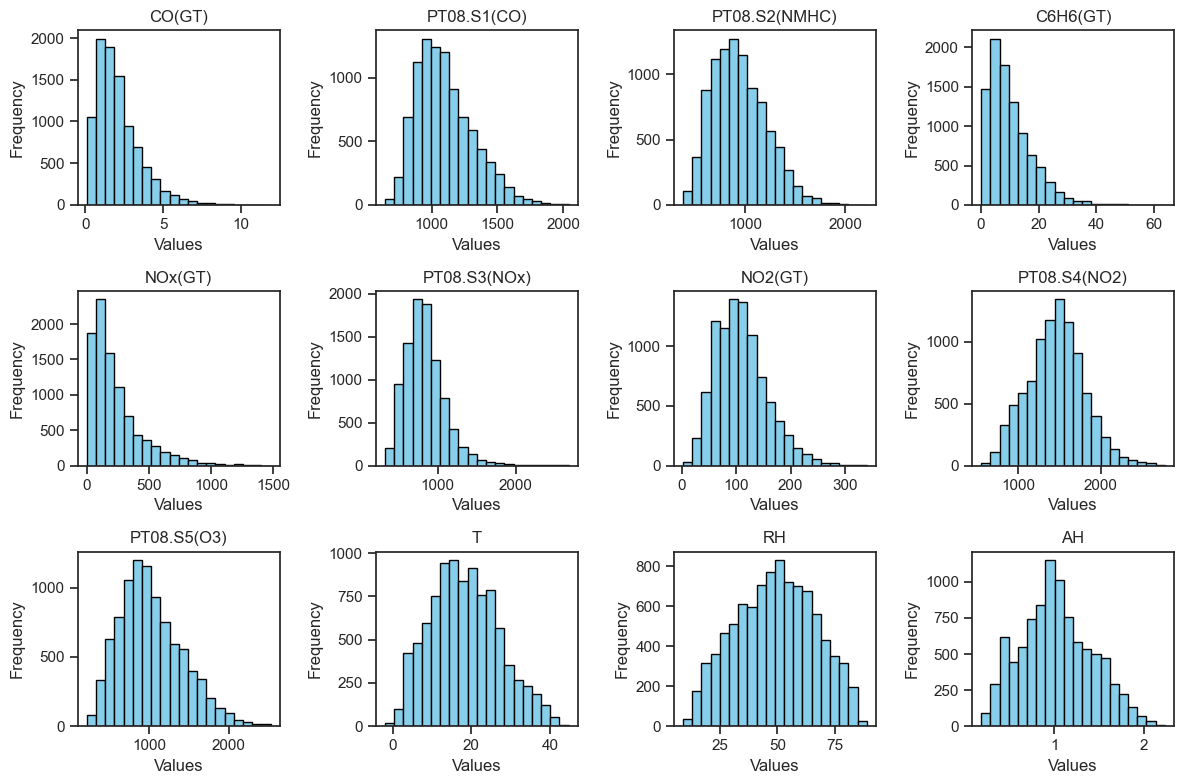

In [82]:
num_cols = ['CO(GT)', 'PT08.S1(CO)', 'PT08.S2(NMHC)', 'C6H6(GT)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH']

plt.figure(figsize=(12, 8))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    plt.hist(aq[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel('Values')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

From this histograms we can see that target variable C6H6(GT) is positively skewed, that means that its distribution is skewed towards higher values. Skewness can impact the performance of my regression model. I decided to handle outliers, as a way to deal with this problem (explained later).

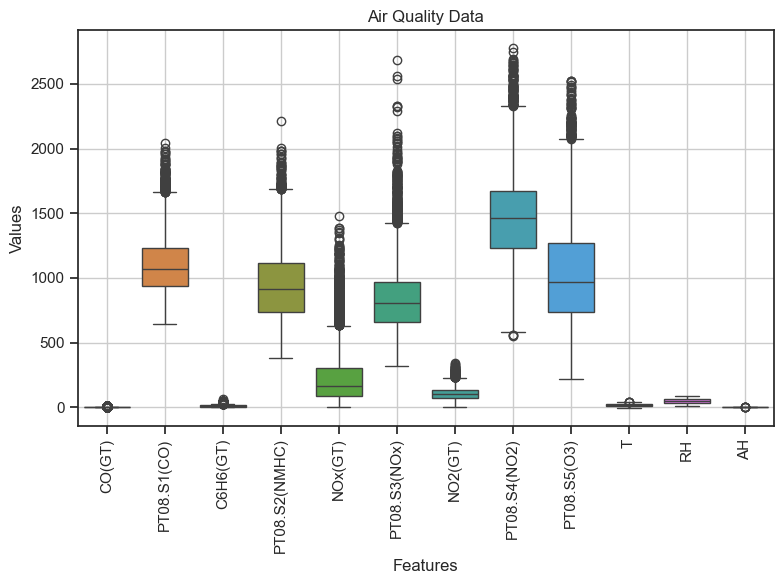

In [83]:
plt.figure(figsize=(8, 6))

# plotting box and whiskers
custom_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']
sns.set_palette(sns.color_palette(custom_colors))

sns.boxplot(data=aq)
plt.xticks(rotation='vertical')
plt.title('Air Quality Data')
plt.xlabel('Features')
plt.ylabel('Values')
plt.grid(True)
plt.tight_layout()
plt.show()

As we can see, there are a lot of outliers in our dataset. I've set a threshold for outliers, which is determined by their distance from Q3 based on the interquartile range (IQR).

In [84]:
Q1 = aq[num_cols].quantile(0.25)
Q3 = aq[num_cols].quantile(0.75)

IQR = Q3 - Q1

scale = 1.4
# making a mask that will filter out outliers in my dataset
mask = (aq[num_cols] < (Q1 - scale * IQR)) | (aq[num_cols] > (Q3 + scale * IQR))

mask.sum()

CO(GT)           337
PT08.S1(CO)      151
PT08.S2(NMHC)     92
C6H6(GT)         279
NOx(GT)          601
PT08.S3(NOx)     289
NO2(GT)          179
PT08.S4(NO2)     132
PT08.S5(O3)      132
T                 18
RH                 0
AH                29
dtype: int64

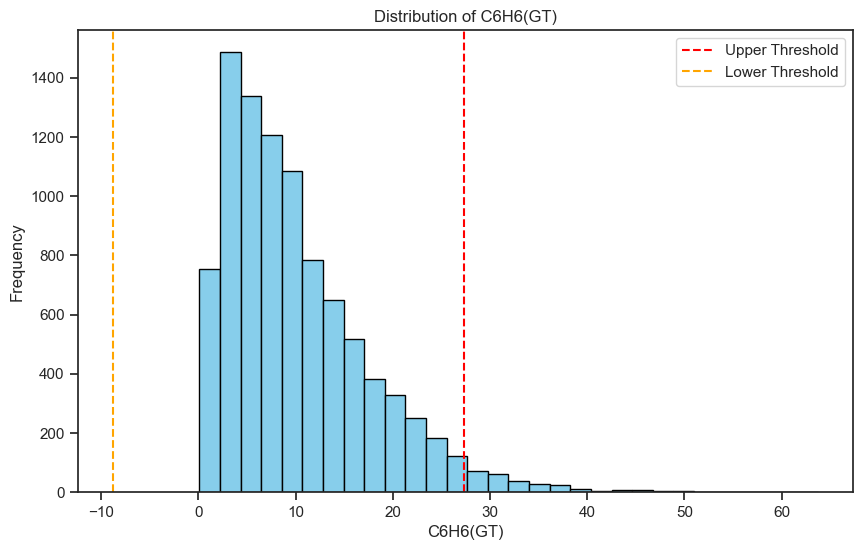

In [85]:
plt.figure(figsize=(10, 6))
plt.hist(aq['C6H6(GT)'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of C6H6(GT)')
plt.xlabel('C6H6(GT)')
plt.ylabel('Frequency')
plt.axvline(x=(Q3['C6H6(GT)'] + scale * IQR['C6H6(GT)']), color='red', linestyle='--', label='Upper Threshold')
plt.axvline(x=(Q1['C6H6(GT)'] - scale * IQR['C6H6(GT)']), color='orange', linestyle='--', label='Lower Threshold')
plt.legend()
plt.show()

Considering that trimming or removing outliers would lead to data loss, I opted to replace outliers with maximum or minimum values falling within the non-outlier range. To set the maximum threshold, I utilized values within the IQR distance from Q3. This approach proved beneficial after tuning, demonstrating improved model performance.

In [86]:
# identify outliers using the mask
scale = 1.4
mask_min = (aq[num_cols] < (Q1 - scale * IQR))
mask_max = (aq[num_cols] > (Q3 + scale * IQR))

min_non_outliers = aq[num_cols].apply(lambda x: x[~mask_min[x.name]].min(), axis=0)
max_non_outliers = aq[num_cols].apply(lambda x: x[~mask_max[x.name]].max(), axis=0)

# Replace outliers in selected columns
aq[num_cols] = np.where(mask_min, min_non_outliers, aq[num_cols])
aq[num_cols] = np.where(mask_max, max_non_outliers, aq[num_cols])

((aq[num_cols] < (Q1 - 1.5 * IQR)) | (aq[num_cols] > (Q3 + 1 * IQR))).sum()

CO(GT)           599
PT08.S1(CO)      407
PT08.S2(NMHC)    259
C6H6(GT)         565
NOx(GT)          916
PT08.S3(NOx)     491
NO2(GT)          405
PT08.S4(NO2)     300
PT08.S5(O3)      369
T                253
RH                 1
AH               210
dtype: int64

<Axes: xlabel='C6H6(GT)', ylabel='Density'>

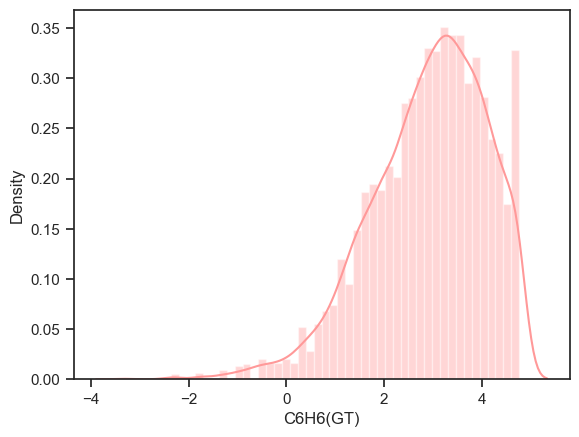

In [87]:
aq['C6H6(GT)'] = np.log2(aq['C6H6(GT)'])

sns.distplot(aq['C6H6(GT)'], norm_hist=True)

# Minor adjustments

Adding week day column.

In [88]:
aq['Week Day'] = aq['Date'].dt.day_name()

# rearranging columns

cols = aq.columns.tolist()
cols = cols[:1] + cols[-1:] + cols[1:11]
aq_filt = aq[cols]
aq_filt.head(10)

Date   Week Day      Time  CO(GT)  PT08.S1(CO)  C6H6(GT)  \
0 2004-03-10  Wednesday  18:00:00     2.6       1360.0  3.572890   
1 2004-03-10  Wednesday  19:00:00     2.0       1292.0  3.232661   
2 2004-03-10  Wednesday  20:00:00     2.2       1402.0  3.169925   
3 2004-03-10  Wednesday  21:00:00     2.2       1376.0  3.201634   
4 2004-03-10  Wednesday  22:00:00     1.6       1272.0  2.700440   
5 2004-03-10  Wednesday  23:00:00     1.2       1197.0  2.232661   
6 2004-03-11   Thursday  00:00:00     1.2       1185.0  1.847997   
7 2004-03-11   Thursday  01:00:00     1.0       1136.0  1.722466   
8 2004-03-11   Thursday  02:00:00     0.9       1094.0  1.201634   
9 2004-03-11   Thursday  03:00:00     0.6       1010.0  0.765535   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0  
1          955.0    103.0        1174.0     92.0        1559.0        972.0  
2          939.0    131.0        1140.0    114.0        1555.0       1074.0  
3          948.0    172.0        1092.0    122.0        1584.0       1203.0  
4          836.0    131.0        1205.0    116.0        1490.0       1110.0  
5          750.0     89.0        1337.0     96.0        1393.0        949.0  
6          690.0     62.0        1394.2     77.0        1333.0        733.0  
7          672.0     62.0        1394.2     76.0        1333.0        730.0  
8          609.0     45.0        1394.2     60.0        1276.0        620.0  
9          561.0     57.8        1394.2     55.8        1235.0        501.0

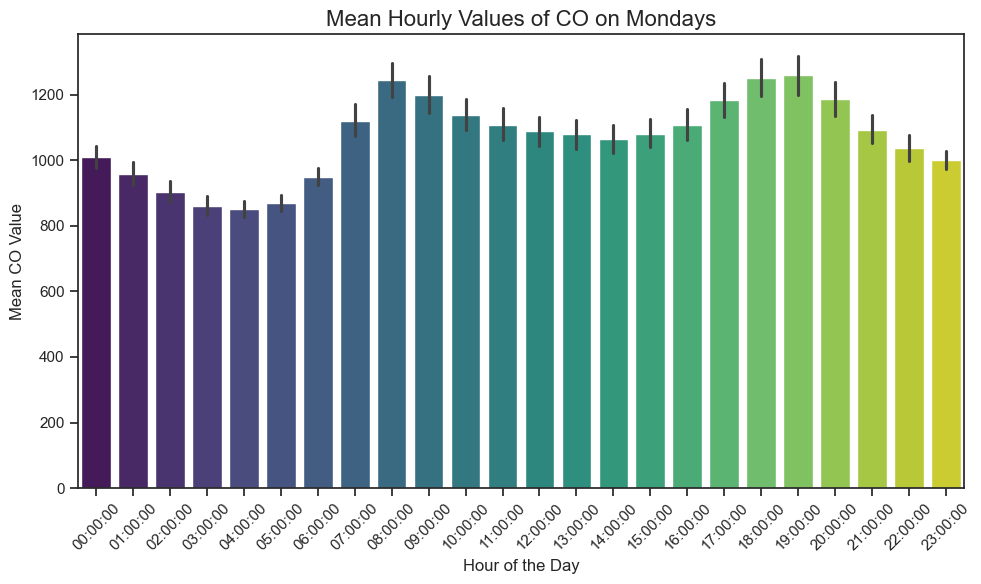

In [89]:
aq_wed = aq_filt[aq_filt['Week Day'] == 'Monday']

#Plotting the mean hourly value of CO on Mondays

plt.figure(figsize=(10, 6))

sns.barplot(x='Time', y='PT08.S1(CO)', data=aq_wed.sort_values('Time'), palette='viridis')
plt.title('Mean Hourly Values of CO on Mondays', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Mean CO Value', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can see that CO emissions are at their peak between 7 and 9 o'clock and between 18 and 20 o'clock, beginnings and endings of office hours.

# Correlation

<Figure size 1200x1000 with 0 Axes>

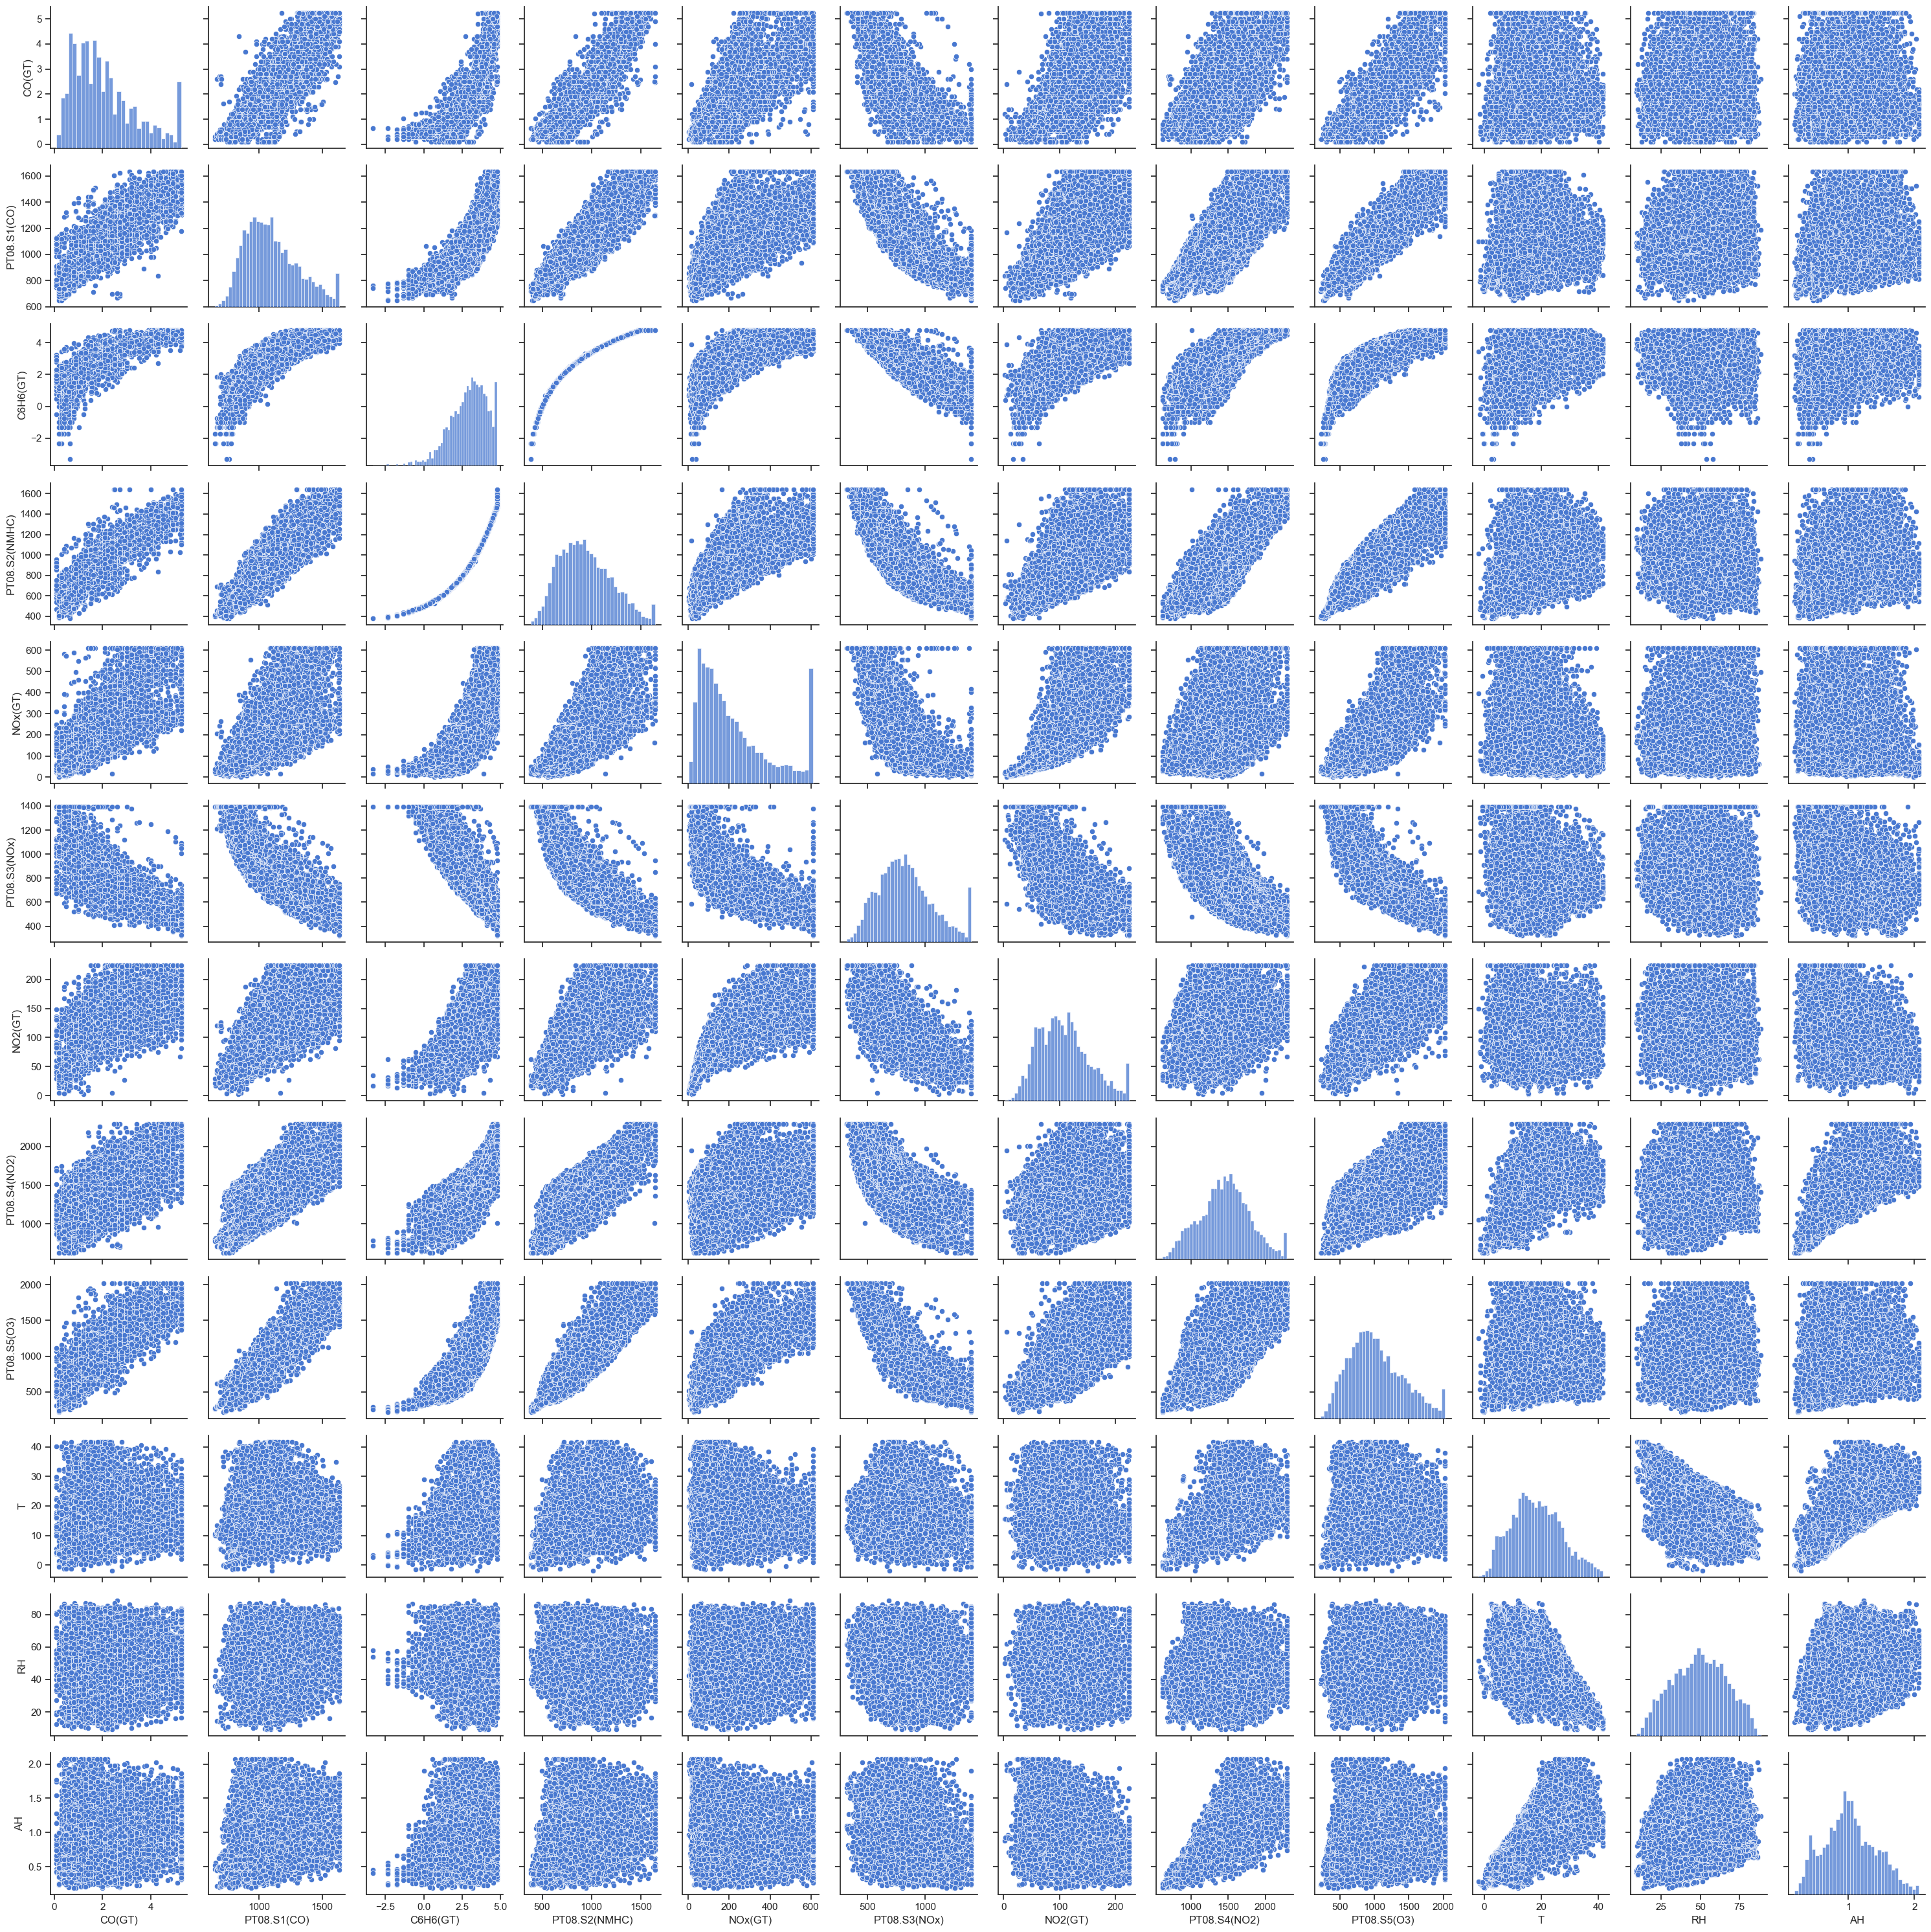

In [90]:
plt.figure(figsize=(12, 10))


sns.set_theme(style="ticks", palette="muted")

pair_plot = sns.pairplot(aq)
plt.tight_layout()
plt.show()

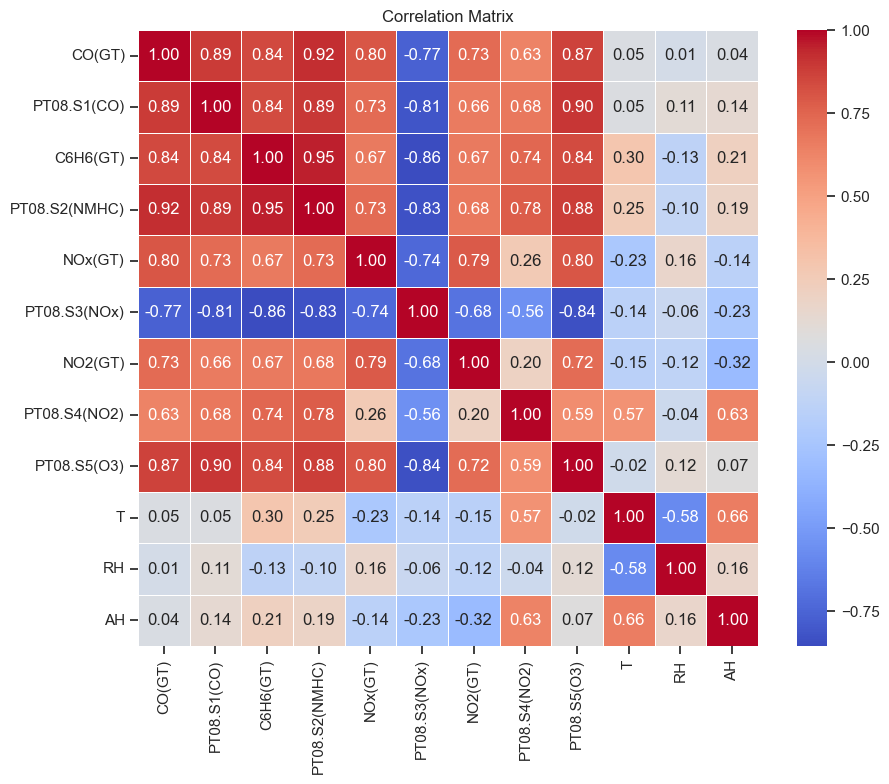

In [91]:
plt.figure(figsize=(10, 8))
sns.heatmap(aq.drop(columns=['Date', 'Week Day', 'Time']).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Column such as T, RH, AH do not have strong correlation with other features. Eliminating the NMHC for being a redundant sensor (the C6H6 molecule is a Non-Methanic Hydrocarbon (NMHC)), so the correlation between those two sensors is exact (multicollinearity issue).

In [92]:
aq_filt.drop('PT08.S2(NMHC)', axis=1, inplace=True)

# Regression

In [93]:
X = aq_filt[['CO(GT)', 'PT08.S1(CO)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)','PT08.S5(O3)']]
y = aq_filt['C6H6(GT)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [120]:
lr_pipeline = make_pipeline(MinMaxScaler(), LinearRegression())

lr_pipeline.fit(X_train, y_train)

y_pred = lr_pipeline.predict(X_test)
print("R2 score of Linear Regression:", r2(y_test, y_pred))
print("Mean Absolute Error of Linear Regression:", mae(y_test, y_pred))
print("Root Mean Squared Error of Linear Regression:", rmse(y_test, y_pred))

R2 score of Linear Regression: 0.8642160489174187
Mean Absolute Error of Linear Regression: 0.3317014622785575
Root Mean Squared Error of Linear Regression: 0.18542407416285142


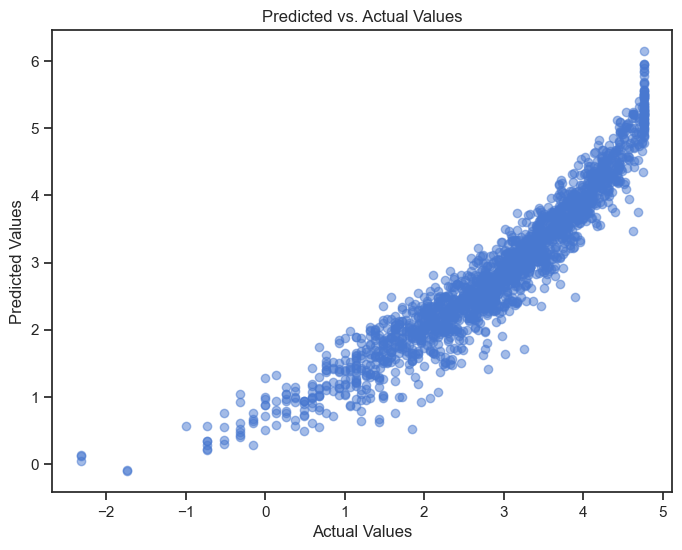

In [95]:
# plotting predicted and actual values to compare results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

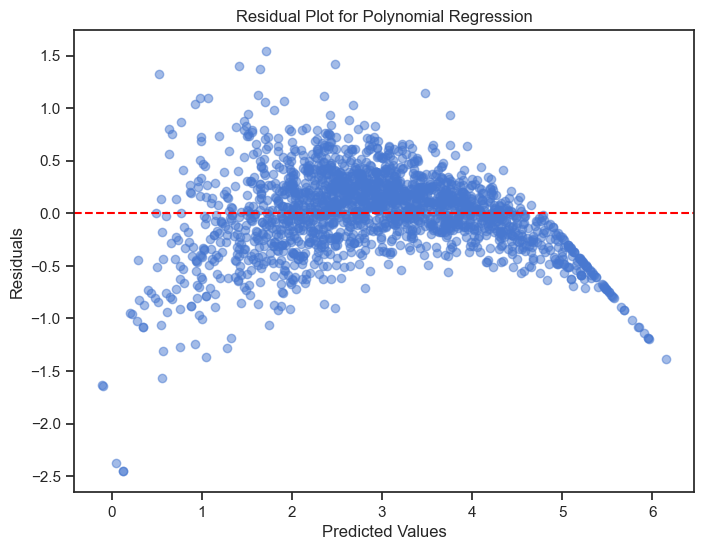

In [96]:
# calculating residuals
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot for Polynomial Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

## Polynomial Regression

In [97]:
pipeline = make_pipeline(PolynomialFeatures(degree=2), MinMaxScaler(), LinearRegression())

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print("R2 score of Linear Regression:", r2(y_test, y_pred))
print("Mean Absolute Error of Linear Regression:", mae(y_test, y_pred))
print("Root Mean Squared Error of Linear Regression:", rmse(y_test, y_pred))

R2 score of Linear Regression: 0.9476224007135552
Mean Absolute Error of Linear Regression: 0.18976620907053704
Root Mean Squared Error of Linear Regression: 0.07152588930524756


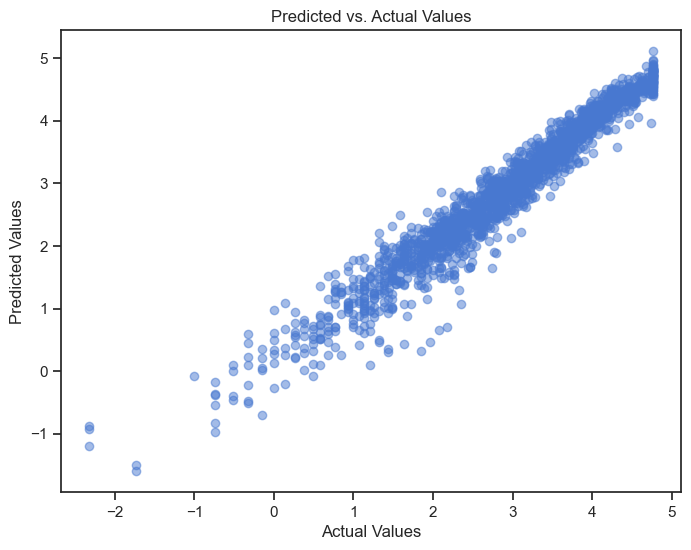

In [98]:
# plotting predicted and actual values to compare results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

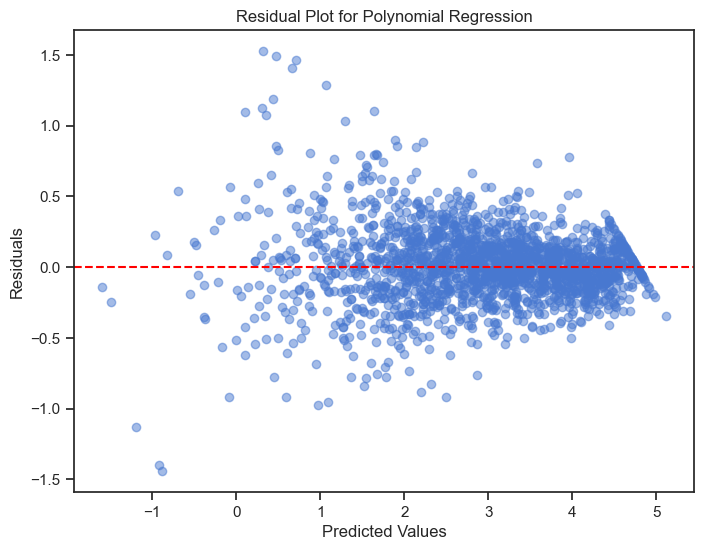

In [99]:
# calculating residuals
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot for Polynomial Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Residuals have uneven bias, heteroskedasticity takes place. Seems like our model lacks variance.  
Adding higher polynomial degree features can help.

## Hyperparameter Tuning for Polynomial Regression degree

In [100]:
param_grid = {'polynomialfeatures__degree': [2, 3, 4, 5],
              'polynomialfeatures__interaction_only': [True, False],
              'polynomialfeatures__include_bias': [True, False]
}

# created a pipeline with PolynomialFeatures and LinearRegression
pipeline = make_pipeline(PolynomialFeatures(), MinMaxScaler(), LinearRegression())

grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best params:", grid_search.best_params_)

Best params: {'polynomialfeatures__degree': 4, 'polynomialfeatures__include_bias': False, 'polynomialfeatures__interaction_only': False}


In [102]:
# re-run my model with best parameters
best_params = grid_search.best_params_
pf = PolynomialFeatures(degree=best_params['polynomialfeatures__degree'], 
                        include_bias=best_params['polynomialfeatures__include_bias'], 
                        interaction_only=best_params['polynomialfeatures__interaction_only'])

best_pipeline = make_pipeline(pf, MinMaxScaler(), LinearRegression())
best_pipeline.fit(X_train, y_train)

# model's performance
y_pred = best_pipeline.predict(X_test)
print("R2 score of Polynomial Regression:", r2(y_test, y_pred))
print("Mean Absolute Error of Polynomial Regression:", mae(y_test, y_pred))
print("Root Mean Squared Error of Polynomial Regression:", rmse(y_test, y_pred))

R2 score of Polynomial Regression: 0.9621895242472714
Mean Absolute Error of Polynomial Regression: 0.16300311813089743
Root Mean Squared Error of Polynomial Regression: 0.05163329247830391


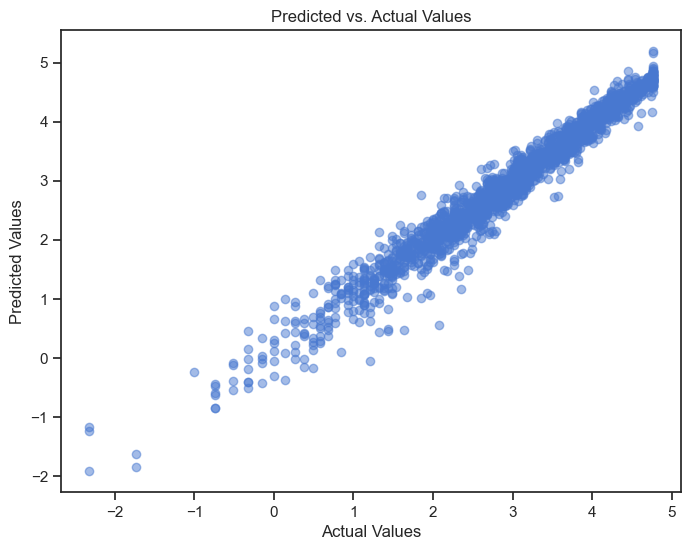

In [103]:
# plotting predicted and actual values to compare results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

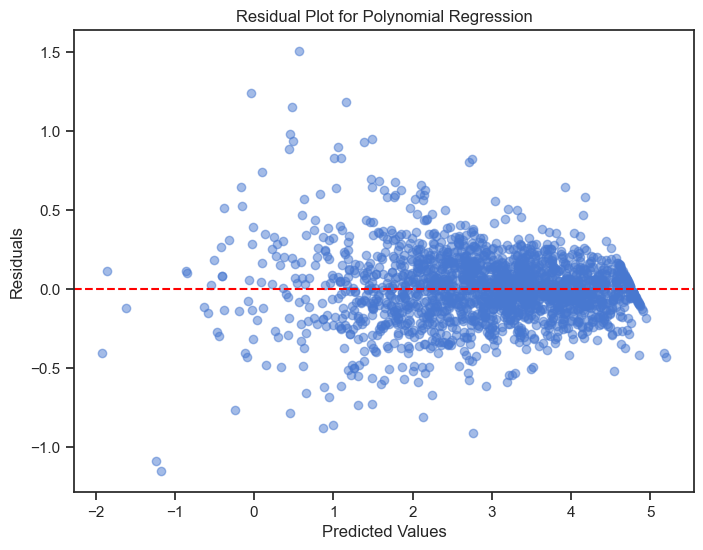

In [104]:
# calculating residuals
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot for Polynomial Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

## Regularization models

### Ridge Regularization 

In [105]:
ridge_pipeline = make_pipeline(pf, Ridge(alpha=5))
ridge_pipeline.fit(X_train, y_train)

# model's performance
y_pred = ridge_pipeline.predict(X_test)
print("R2 score of Polynomial Regression with ridge regularization:", r2(y_test, y_pred))
print("Mean Absolute Error of Polynomial Regression with ridge regularization:", mae(y_test, y_pred))
print("Root Mean Squared Error of Polynomial Regression with ridge regularization:", rmse(y_test, y_pred)) 

R2 score of Polynomial Regression with ridge regularization: 0.9624327549306055
Mean Absolute Error of Polynomial Regression with ridge regularization: 0.16236187551043466
Root Mean Squared Error of Polynomial Regression with ridge regularization: 0.05130114111648505


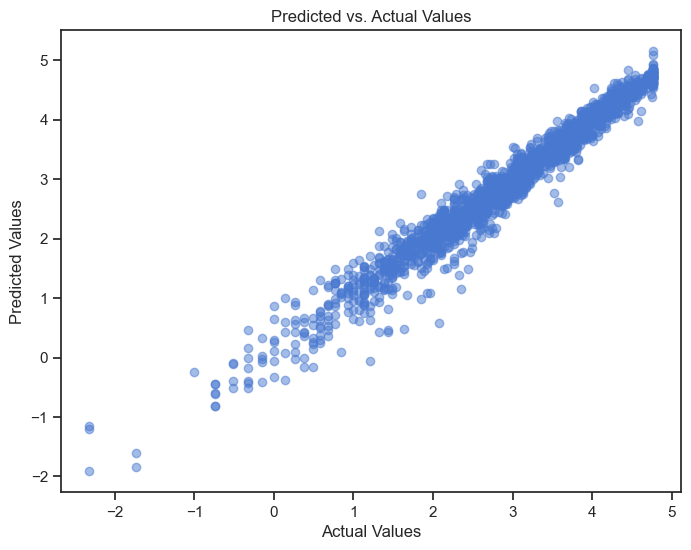

In [106]:
# plotting predicted and actual values to compare results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

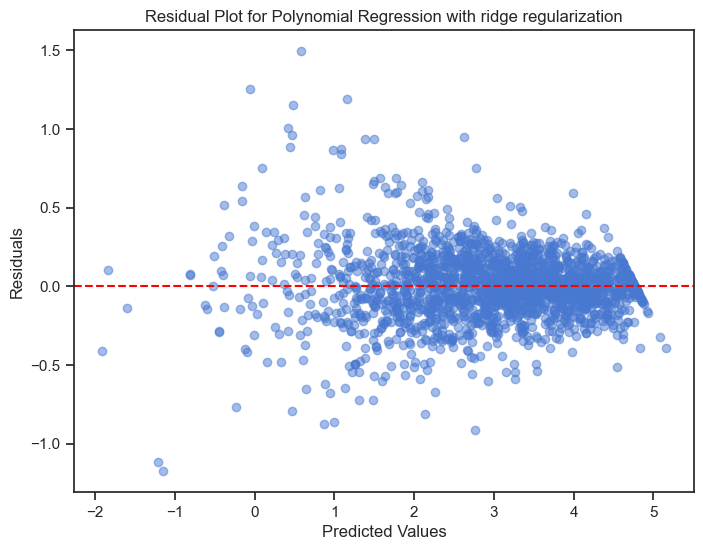

In [107]:
# calculating residuals
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot for Polynomial Regression with ridge regularization')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

### Lasso regularization

In [108]:
lasso_pipeline = make_pipeline(pf, Lasso(alpha=0.01))
lasso_pipeline.fit(X_train, y_train)

# model's performance
y_pred = lasso_pipeline.predict(X_test)
print("R2 score of Polynomial Regression with lasso regularization:", r2(y_test, y_pred))
print("Mean Absolute Error of Polynomial Regression with lasso regularization:", mae(y_test, y_pred))
print("Root Mean Squared Error of Polynomial Regression with lasso regularization:", rmse(y_test, y_pred))

R2 score of Polynomial Regression with lasso regularization: 0.9557917489351576
Mean Absolute Error of Polynomial Regression with lasso regularization: 0.17429870649838558
Root Mean Squared Error of Polynomial Regression with lasso regularization: 0.06036997714900672


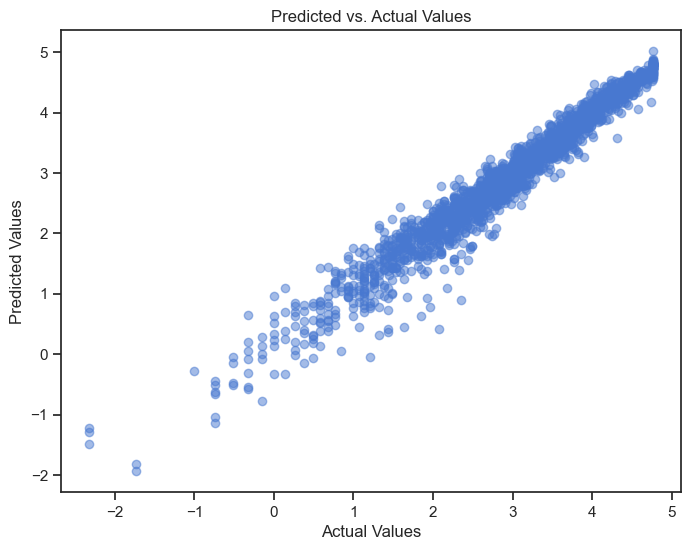

In [109]:
# plotting predicted and actual values to compare results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

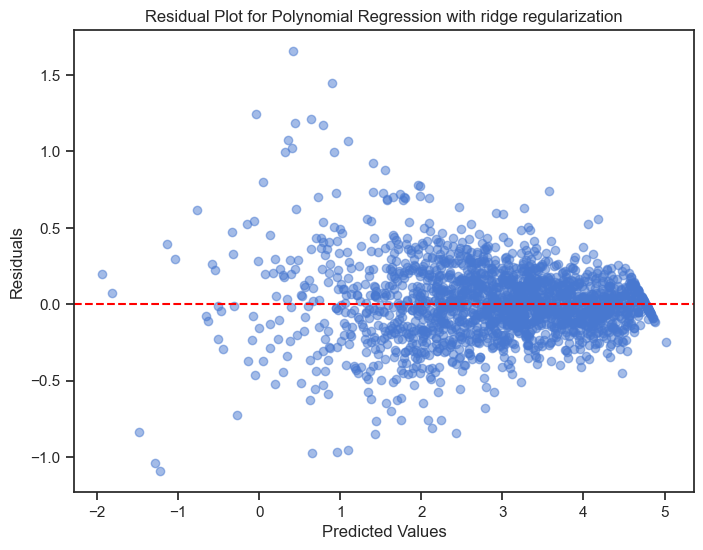

In [110]:
# calculating residuals
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot for Polynomial Regression with ridge regularization')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

## Decision Tree Regressor

In [111]:
from sklearn.preprocessing import RobustScaler

sc = RobustScaler()
x_train_scaled = sc.fit_transform(X_train)
x_test_scaled = sc.fit_transform(X_test)

X_train = pd.DataFrame(x_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(x_test_scaled, columns=X_test.columns)

In [112]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

y_pred = dt_regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error of Decision Tree Regressor: {mse}")

Mean Squared Error of Decision Tree Regressor: 0.0913911301899837


Text(0.5, 1.0, 'Decision Tree Predicted vs Actual')

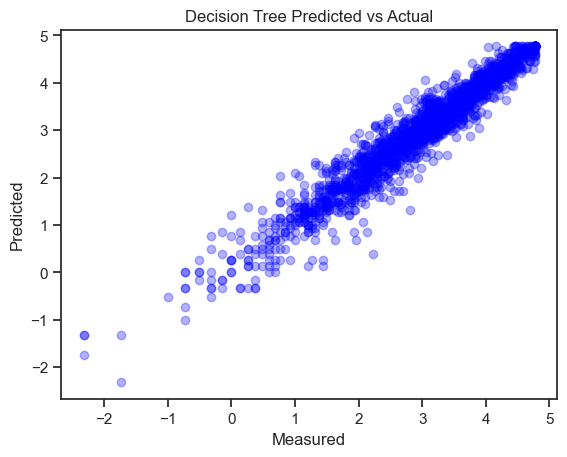

In [113]:
plt.scatter(y_test, y_pred, c="blue", alpha=0.3)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Decision Tree Predicted vs Actual')

In [114]:
param_grid = {
    'splitter': ['best', 'random'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'criterion':['mse','friedman_mse','mae'],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_score_dt = grid_search.best_score_
best_params_dt = grid_search.best_params_
print(f"Best Score: {best_score_dt}")
print(f"Best Parameters: {best_params_dt}")

Best Score: 0.9318019239626134
Best Parameters: {'criterion': 'friedman_mse', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'best'}


In [115]:
final_dt_regressor = DecisionTreeRegressor(**best_params_dt)
final_dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt',
                      min_samples_leaf=5)

Text(0.5, 1.0, 'Decision Tree Predicted vs Actual')

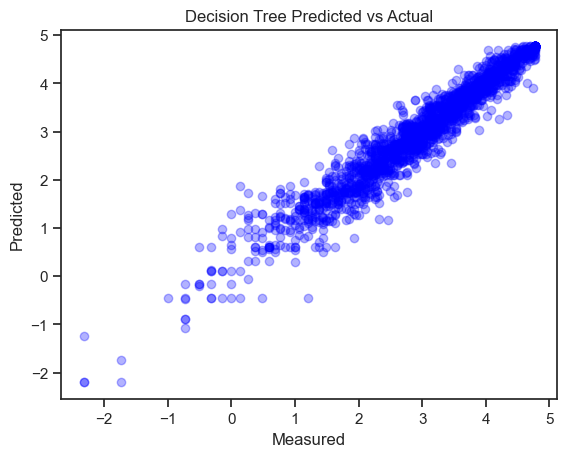

In [116]:
y_pred_dt = final_dt_regressor.predict(X_test)

plt.scatter(y_test, y_pred_dt, c="blue", alpha=0.3)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Decision Tree Predicted vs Actual')

### Feature importance

In [117]:
feature_importance = dt_regressor.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

        Feature  Importance
0        CO(GT)    0.720728
3  PT08.S3(NOx)    0.121365
5  PT08.S4(NO2)    0.063916
6   PT08.S5(O3)    0.048647
2       NOx(GT)    0.027022
1   PT08.S1(CO)    0.009802
4       NO2(GT)    0.008519


We see that CO (Carbon Monoxide) is the most significant feature contributing to our predictions. This is because it contributes the most to air pollution. The primary sources of CO in outdoor air are cars, trucks, and other vehicles or machinery that burn fossil fuels. The sensor measurement for Nitrogen Oxides (NOx) concentration (PT08.S3(NOx)) is the second most important feature, indicating the relevance of NOx levels in predicting air pollution. NOx emissions primarily originate from combustion processes in vehicles and industrial facilities.

In [118]:
mae_dt = mae(y_test, y_pred_dt)
mse_dt = rmse(y_test, y_pred_dt)
r2_dt = r2(y_test, y_pred_dt)

print("Decision Tree MAE:", mae_dt)
print("Decision Tree MSE:", mse_dt)
print("Decision Tree R-squared:", r2_dt)

Decision Tree MAE: 0.2185497263181832
Decision Tree MSE: 0.0935860417692756
Decision Tree R-squared: 0.931468000716826


# Conclusion

The slight difference between the linear regression models indicates that the data might not benefit significantly from polynomial transformations. The small improvement suggests that the default hyperparameters used in the initial model were already close to optimal. It's also possible that other hyperparameters beyond the degree of the polynomial could be fine-tuned for a better performance boost. Linear regression without regularization beats every other model in every aspect, it has least MSE, MAE and biggest R2 score.